# ***Objective***
The objective of this project is to develop a predictive model that accurately forecasts sales based on advertising expenditures across various media channels, including Radio, TV, and Newspaper. By utilizing machine learning algorithms such as Linear Regression, Decision Trees, Random Forests, and XGBoost, the goal is to identify the most effective model for predicting sales. This project will analyze the relationships between advertising spend and sales, evaluate model performance using metrics like MSE and R-squared, and ultimately provide actionable insights to optimize advertising strategies for better business outcomes. Additionally, the project aims to visualize key findings to enhance understanding of sales drivers and model performance. By delivering a robust predictive solution, this initiative will empower stakeholders to make informed decisions and improve marketing effectiveness, contributing to overall business growth.



In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('Advertising.csv')
df1 = pd.read_csv('Advertising.csv')

In [62]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [63]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [64]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
130,131,0.7,39.6,8.7,1.6
165,166,234.5,3.4,84.8,11.9
29,30,70.6,16.0,40.8,10.5
31,32,112.9,17.4,38.6,11.9
54,55,262.7,28.8,15.9,20.2


In [65]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [67]:
df.isnull().mean()

Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
Sales         0.0
dtype: float64

In [68]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [69]:
df1.drop(columns=['Unnamed: 0'], inplace=True)
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# ***Data Cleaning***

In [70]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# ***Data Visualization***

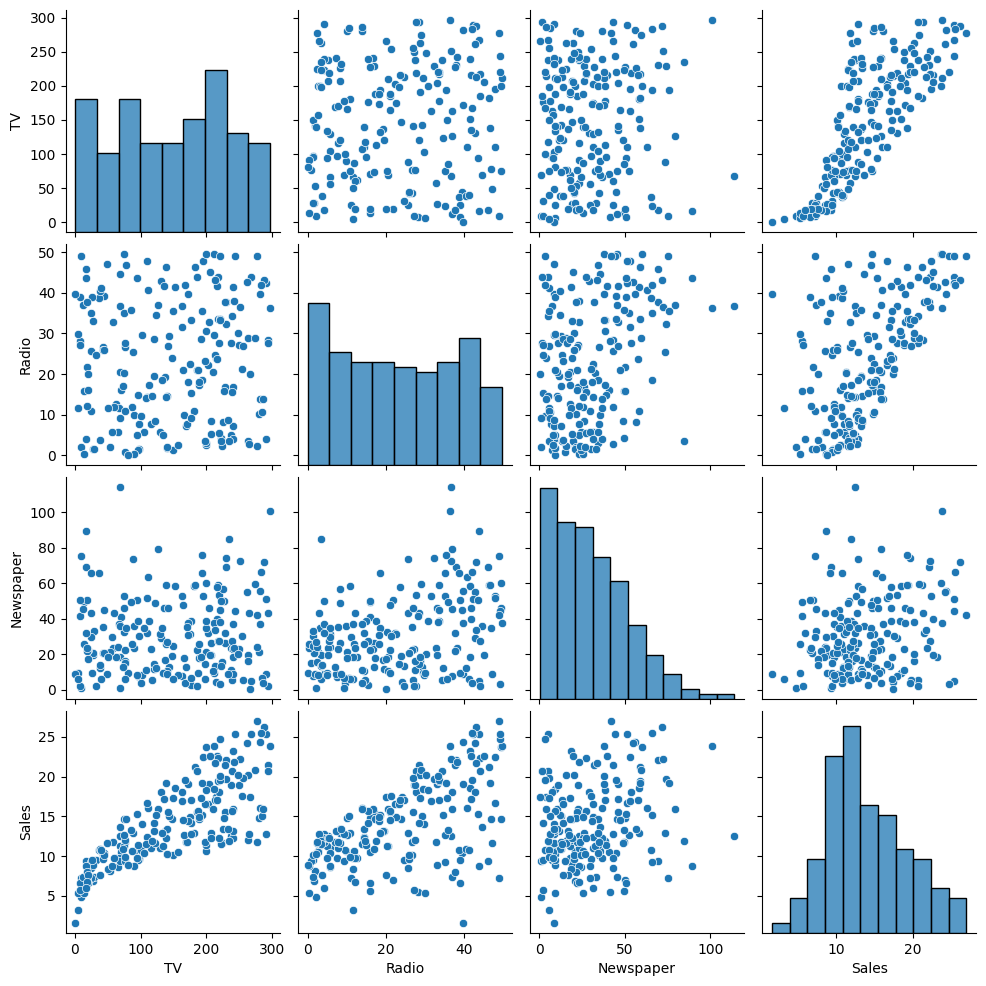

In [71]:
sns.pairplot(df)
plt.show()

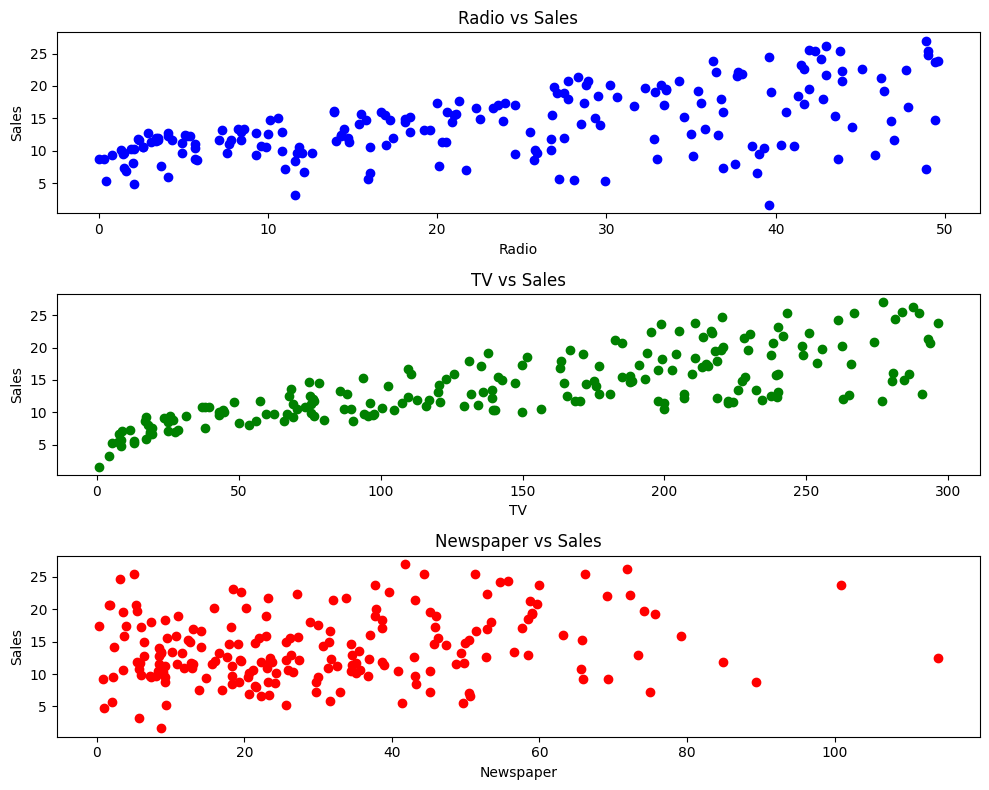

In [72]:
plt.figure(figsize=(10, 8))

# Scatter plot for Radio vs Sales
plt.subplot(3, 1, 1)
plt.scatter(df['Radio'], df['Sales'], color='blue')
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')

# Scatter plot for TV vs Sales
plt.subplot(3, 1, 2)
plt.scatter(df['TV'], df['Sales'], color='green')
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

# Scatter plot for Newspaper vs Sales
plt.subplot(3, 1, 3)
plt.scatter(df['Newspaper'], df['Sales'], color='red')
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

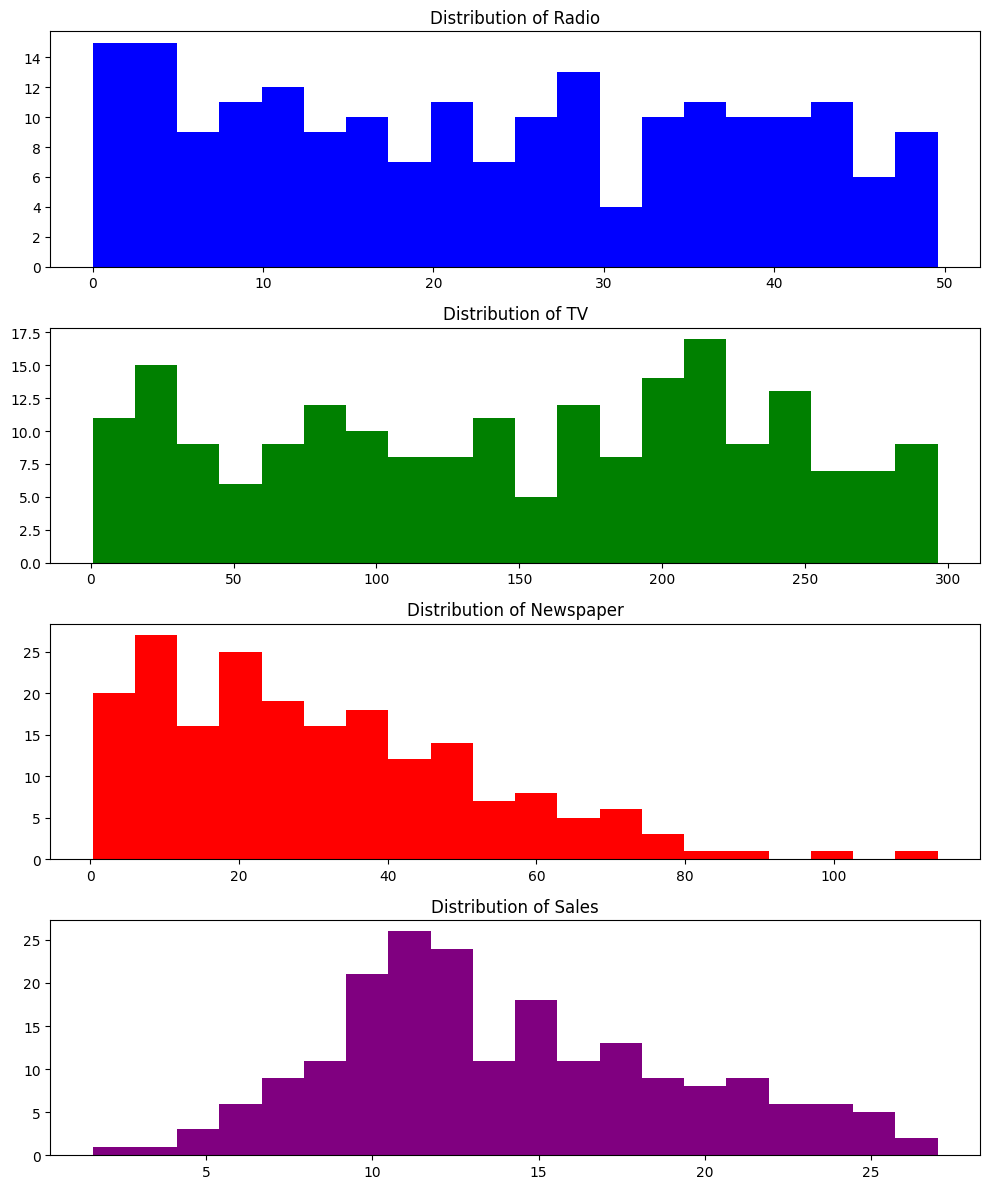

In [73]:
plt.figure(figsize=(10, 12))

# Histogram for Radio

plt.subplot(4, 1, 1)
plt.hist(df['Radio'], bins=20, color='blue')
plt.title('Distribution of Radio')

# Histogram for TV
plt.subplot(4, 1, 2)
plt.hist(df['TV'], bins=20, color='green')
plt.title('Distribution of TV')

# Histogram for Newspaper
plt.subplot(4, 1, 3)
plt.hist(df['Newspaper'], bins=20, color='red')
plt.title('Distribution of Newspaper')

# Histogram for Sales
plt.subplot(4, 1, 4)
plt.hist(df['Sales'], bins=20, color='purple')
plt.title('Distribution of Sales')

plt.tight_layout()
plt.show()

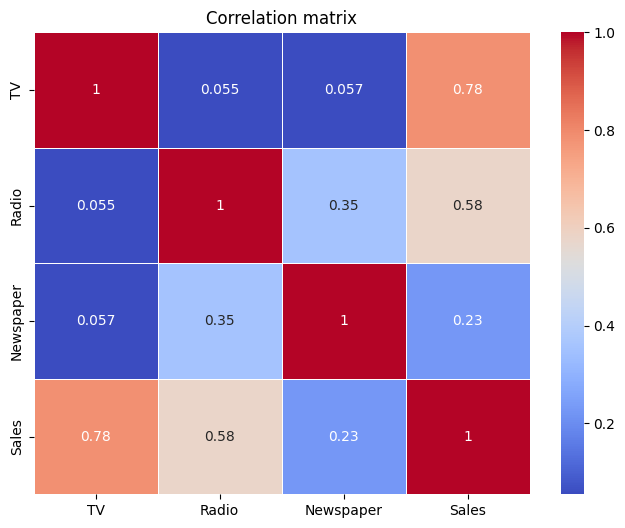

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

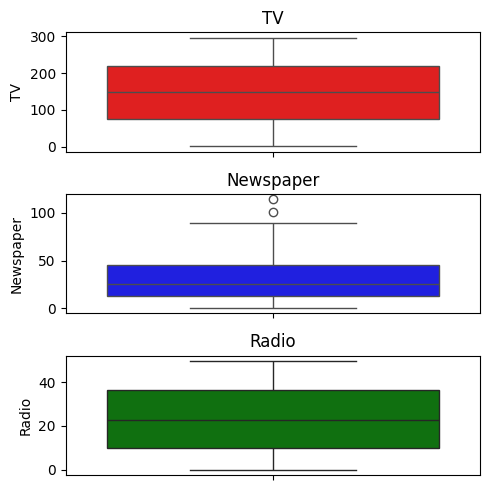

In [75]:
# Assuming 'df' is your DataFrame
fig, axs = plt.subplots(3, figsize=(5, 5))

# Boxplot for 'TV' with red color
plt1 = sns.boxplot(df['TV'], ax=axs[0], color='red')
plt1.set_title('TV')

# Boxplot for 'Newspaper' with red color
plt2 = sns.boxplot(df['Newspaper'], ax=axs[1], color='blue')
plt2.set_title('Newspaper')

# Boxplot for 'Radio' with red color
plt3 = sns.boxplot(df['Radio'], ax=axs[2], color='green')
plt3.set_title('Radio')

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()

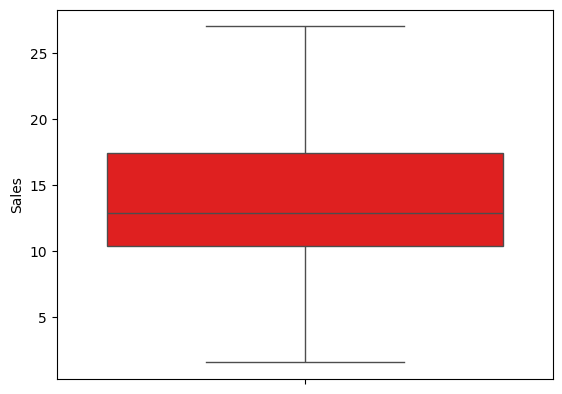

In [76]:
sns.boxplot(df['Sales'], color='red')
plt.show()

# ***Model Building***

In [77]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df = mm.fit_transform(df)

In [78]:
df = pd.DataFrame(df, columns=df1.columns)
df

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882
...,...,...,...,...
195,0.126818,0.074597,0.118734,0.236220
196,0.316199,0.098790,0.068602,0.318898
197,0.596212,0.187500,0.053650,0.440945
198,0.956713,0.846774,0.579595,0.940945


In [79]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
X_train

,TV,Radio,Newspaper
169,0.959080,0.213710,0.053650
97,0.622929,0.423387,0.190853
31,0.379439,0.350806,0.336851
12,0.078120,0.707661,0.576957
35,0.980724,0.082661,0.072120
...,...,...,...
106,0.082178,0.221774,0.258575
14,0.687859,0.663306,0.401935
92,0.733852,0.675403,0.516271
179,0.557660,0.201613,0.152155


In [87]:
y_train

169    0.527559
97     0.547244
31     0.405512
12     0.299213
35     0.440945
         ...   
106    0.220472
14     0.685039
92     0.700787
179    0.433071
102    0.519685
Name: Sales, Length: 140, dtype: float64

In [88]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred = lr.predict(X_test)

In [93]:
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = mean_squared_error(y_test, y_pred, squared=False)
r2_lr = r2_score(y_test, y_pred)

In [96]:
print('Linear Regression:')
print(f'Mean Squared Error (MSE): {mse_lr}')
print(f'Mean Absolute Error (MAE): {mae_lr}')
print(f'Root Mean Squared Error (RMSE): {rmse_lr}')
print(f'R-squared (R2): {r2_lr}')

Linear Regression:
Mean Squared Error (MSE): 0.005885047487003568
Mean Absolute Error (MAE): 0.059514536317122384
Root Mean Squared Error (RMSE): 0.07671406316317476
R-squared (R2): 0.8609466508230367


In [95]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred1 = dtr.predict(X_test)

In [97]:
mse_dtr = mean_squared_error(y_test, y_pred1)
mae_dtr = mean_absolute_error(y_test, y_pred1)
rmse_dtr = mean_squared_error(y_test, y_pred1, squared=False)
r2_dtr = r2_score(y_test, y_pred1)

In [99]:
print("Decision Tree Regression:")
print(f'Mean Squared Error (MSE): {mse_dtr}')
print(f'Mean Absolute Error (MAE): {mae_dtr}')
print(f'Root Mean Squared Error (RMSE): {rmse_dtr}')
print(f'R-squared (R2): {r2_dtr}')

Decision Tree Regression:
Mean Squared Error (MSE): 0.002799305598611197
Mean Absolute Error (MAE): 0.04120734908136484
Root Mean Squared Error (RMSE): 0.052908464338054614
R-squared (R2): 0.9338573189568428


In [100]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
y_pred2 = rfr.predict(X_test)

In [101]:
mse_rfr = mean_squared_error(y_test, y_pred2)
mae_rfr = mean_absolute_error(y_test, y_pred2)
rmse_rfr = mean_squared_error(y_test, y_pred2, squared=False)
r2_rfr = r2_score(y_test, y_pred2)

In [102]:
print("Random Forest Regression:")
print(f'Mean Squared Error (MSE): {mse_rfr}')
print(f'Mean Absolute Error (MAE): {mae_rfr}')
print(f'Root Mean Squared Error (RMSE): {rmse_rfr}')
print(f'R-squared (R2): {r2_rfr}')

Random Forest Regression:
Mean Squared Error (MSE): 0.0006767267551201801
Mean Absolute Error (MAE): 0.021959317585301886
Root Mean Squared Error (RMSE): 0.026013972305670277
R-squared (R2): 0.984010133820512


In [103]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)
y_pred3 = xgb_model.predict(X_test)

In [104]:
mse_xgb = mean_squared_error(y_test, y_pred3)
mae_xgb = mean_absolute_error(y_test, y_pred3)
rmse_xgb = mean_squared_error(y_test, y_pred3, squared=False)
r2_xgb = r2_score(y_test, y_pred3)

In [105]:
print("XGBoost Regression:")
print(f'Mean Squared Error (MSE): {mse_xgb}')
print(f'Mean Absolute Error (MAE): {mae_xgb}')
print(f'Root Mean Squared Error (RMSE): {rmse_xgb}')
print(f'R-squared (R2): {r2_xgb}')

XGBoost Regression:
Mean Squared Error (MSE): 0.0013520554526226828
Mean Absolute Error (MAE): 0.028006588651986894
Root Mean Squared Error (RMSE): 0.03677030667022894
R-squared (R2): 0.9680533012902016


In [106]:
metrics = {
    "Model": ["Linear Regression", "Decision Tree Regression", "Random Forest Regression", "XGBoost Regression"],
    "Mean Squared Error": [mse_lr, mse_dtr, mse_rfr, mse_xgb],
    "Mean Absolute Error": [mae_lr, mae_dtr, mae_rfr, mae_xgb],
    "Root MSE": [rmse_lr, rmse_dtr, rmse_rfr, rmse_xgb],
    "R-Squared": [r2_lr, r2_dtr, r2_rfr, r2_xgb]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the DataFrame
print(metrics_df)

                      Model  Mean Squared Error  Mean Absolute Error  \
0         Linear Regression            0.005885             0.059515   
1  Decision Tree Regression            0.002799             0.041207   
2  Random Forest Regression            0.000677             0.021959   
3        XGBoost Regression            0.001352             0.028007   

   Root MSE  R-Squared  
0  0.076714   0.860947  
1  0.052908   0.933857  
2  0.026014   0.984010  
3  0.036770   0.968053  


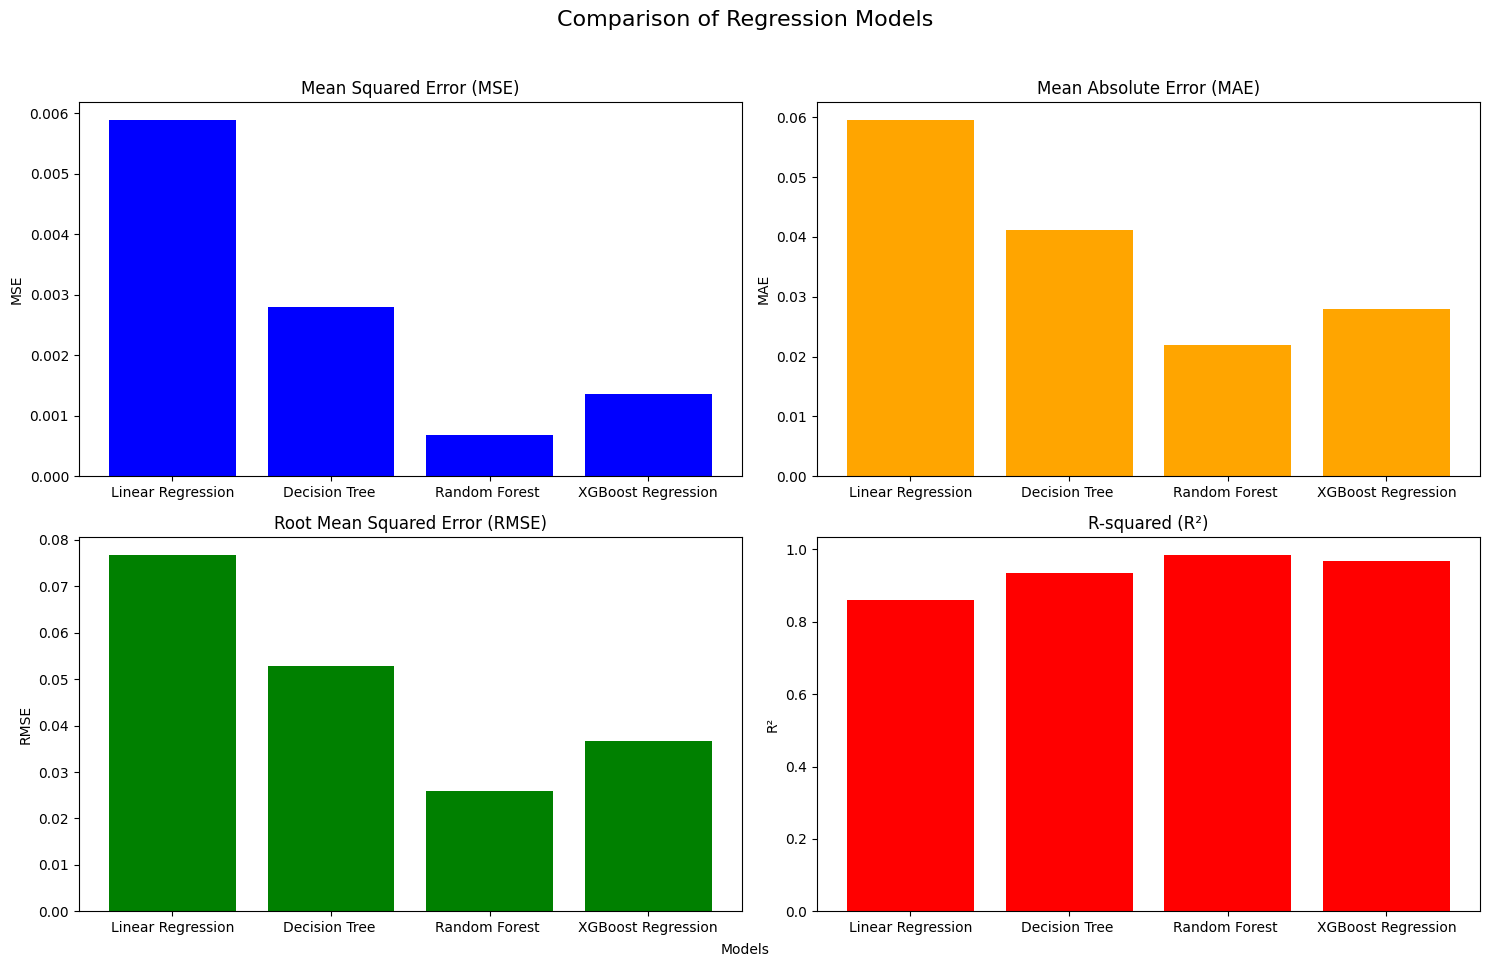

In [113]:
# Define the metrics for each model
models = ["Linear Regression", "Decision Tree ", "Random Forest ", "XGBoost Regression"]
mse = [mse_lr, mse_dtr, mse_rfr, mse_xgb]
mae = [mae_lr, mae_dtr, mae_rfr, mae_xgb]
rmse = [rmse_lr, rmse_dtr, rmse_rfr, rmse_xgb]
r2 = [r2_lr, r2_dtr, r2_rfr, r2_xgb]

# Plotting the metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# MSE
axs[0, 0].bar(models, mse, color='blue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')

# MAE
axs[0, 1].bar(models, mae, color='orange')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_ylabel('MAE')

# RMSE
axs[1, 0].bar(models, rmse, color='green')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_ylabel('RMSE')

# R²
axs[1, 1].bar(models, r2, color='red')
axs[1, 1].set_title('R-squared (R²)')
axs[1, 1].set_ylabel('R²')

# Set a common y-label for the entire figure
fig.text(0.5, 0.04, 'Models', ha='center', va='center')
fig.suptitle('Comparison of Regression Models', fontsize=16)
plt.tight_layout(rect=[0, 0.04, 1, 0.96])

# Show plot
plt.show()


# ***Conclusion***
Random Forest Regression is the best model among the four models. It has the lowest prediction errors (MSE, MAE, RMSE) and the highest proportion of explained variance (R²).

# ***Saving the model***

In [115]:
import pickle
with open('sales_prediction.pkl', 'wb') as file:
    pickle.dump(rfr, file)